# Lista final de Tópicos em e-science 2019

Compartilhado via github com ricardogando 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1) Faça uma figura simples em matplotlib com labels com descrição e unidades que misturem caracteres que usem e não usem Latex com fontes consistentes.

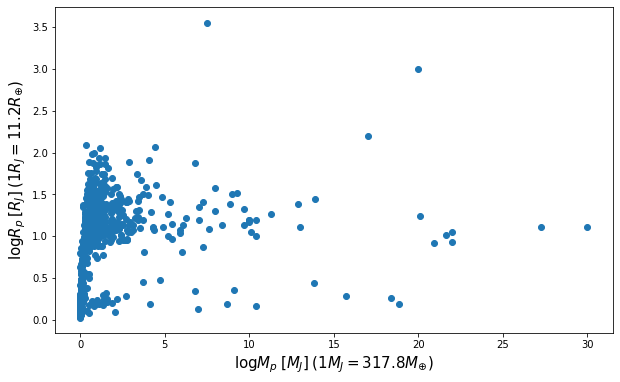

In [2]:
# Vou fazer um gráfico da distribuição de massas e raios planetários da base de exolpanetas da NASA
#(extraída no dia 7/11), só figurarão no gráfico os dados que  possuem ambos os parâmetros, eles estão 
#em unidades de massa e raio de Júpiter.

# Aqui vou gerar um sem mudar as legendas para comparação.

# Lendo o arquivo

df=pd.read_csv('planets_2019.11.07_15.49.30.csv',delimiter=',',comment='#')

a=df.pl_bmassj
b=df.pl_radj

plt.figure(figsize=[10,6])

plt.xlabel('$\log{M_{p}} \: [M_{J}] \: (1 M_{J} = 317.8 M_{\oplus}$)',fontsize=15)
plt.ylabel('$\log{R_{p}} \: [R_{J}] \: (1 R_{J} = 11.2 R_{\oplus}$)',fontsize=15)

plt.scatter(a,b)

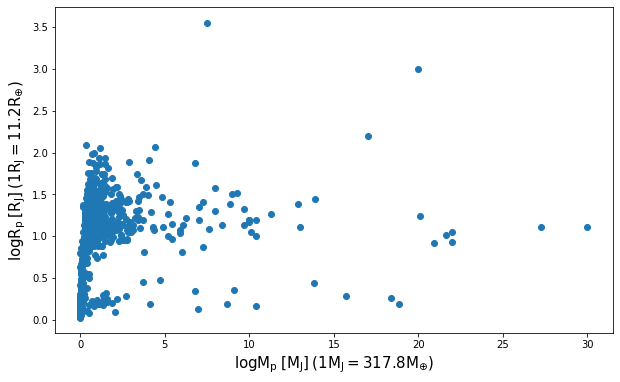

In [3]:
# Abaixo o mesmo gráfico, mas com toda a label com a mesma fonte e sem itálico.
plt.figure(figsize=[10,6])

plt.xlabel('$\mathrm{\log{M_{p}} \: [M_{J}] \: (1 M_{J} = 317.8 M_{\oplus}}$)',fontsize=15)
plt.ylabel('$\mathrm{\log{R_{p}} \: [R_{J}] \: (1 R_{J} = 11.2 R_{\oplus}}$)',fontsize=15)

plt.scatter(a,b)

### 2) Na figura acima, teste 3 diferentes stylesheets, ao menos um com fonte bem visíveis.

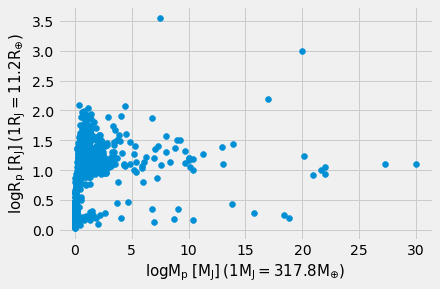

In [4]:
# Fonte: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

# stylesheet 1: fivethirtyeight
plt.style.use('fivethirtyeight')

plt.xlabel('$\mathrm{\log{M_{p}} \: [M_{J}] \: (1 M_{J} = 317.8 M_{\oplus}}$)',fontsize=15)
plt.ylabel('$\mathrm{\log{R_{p}} \: [R_{J}] \: (1 R_{J} = 11.2 R_{\oplus}}$)',fontsize=15)

plt.scatter(a,b)

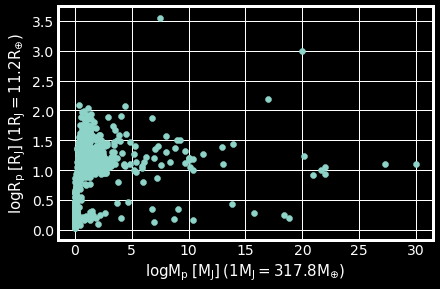

In [5]:
# stylesheet 2: dark_background
plt.style.use('dark_background')

plt.xlabel('$\mathrm{\log{M_{p}} \: [M_{J}] \: (1 M_{J} = 317.8 M_{\oplus}}$)',fontsize=15)
plt.ylabel('$\mathrm{\log{R_{p}} \: [R_{J}] \: (1 R_{J} = 11.2 R_{\oplus}}$)',fontsize=15)

plt.scatter(a,b)

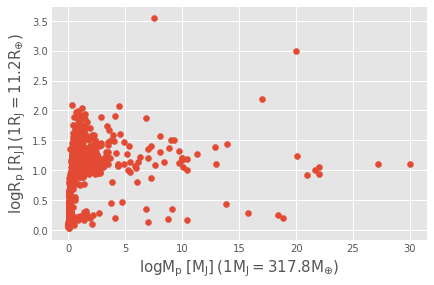

In [6]:
# stylesheet 3: ggplot
plt.style.use('ggplot')

plt.xlabel('$\mathrm{\log{M_{p}} \: [M_{J}] \: (1 M_{J} = 317.8 M_{\oplus}}$)',fontsize=15)
plt.ylabel('$\mathrm{\log{R_{p}} \: [R_{J}] \: (1 R_{J} = 11.2 R_{\oplus}}$)',fontsize=15)

plt.scatter(a,b)

### 3) Na lição "Reading Tabular Data into DataFrames" usamos como exemplo o GDP de países. No World Bank (https://www.worldbank.org/) é possível acessar várias estatísticas de países. Baixe os dados do GDP per capita de 3 países: Brasil, Canadá, e Estados Unidos e compare com os dados da lição. Use estatísticas e figuras para realizar a comparação e verificar se os dados estão corretos.

### a) Tratando as tabelas

In [7]:
# Lendo o arquivo do worldbank.org, e colocando num formato amigável.
wb=pd.read_csv('gdp_licao.csv',delimiter=',',comment='#',index_col='Country Name')
wb = wb.drop(['Country Code','Indicator Name', 'Indicator Code','Unnamed: 64'], axis = 1)
wb.columns = wb.columns.astype(int)
wb=wb.T
wb=wb.reset_index()
wb=wb.rename(columns={'index':'ano'})

# Separando cada país.
wbaus=wb.filter(['ano','Australia'])
wbbras=wb.filter(['ano','Brazil'])
wbcan=wb.filter(['ano','Canada'])

In [8]:
# Lendo o arquivo do software-carpentry pras americas, e colocando num formato amigável.
scam=pd.read_csv('gapminder_gdp_americas.csv',delimiter=',',comment='#',index_col='country')
scam = scam.drop('continent', axis = 1)
years = scam.columns.str.strip('gdpPercap_')
scam.columns = years.astype(int)
scam=scam.T
scam=scam.reset_index()
scam=scam.rename(columns={'index':'ano'})

# Separando os países da América.
sccan=scam.filter(['ano','Canada'])
scbras=scam.filter(['ano','Brazil'])

In [9]:
# O mesmo agora  para o arquivo da oceania.
scoc=pd.read_csv('gapminder_gdp_oceania.csv',delimiter=',',comment='#',index_col='country')
years = scoc.columns.str.strip('gdpPercap_')
scoc.columns = years.astype(int)
scoc=scoc.T
scoc=scoc.reset_index()
scoc=scoc.rename(columns={'index':'ano'})

# Separando país
scaus=scoc.filter(['ano','Australia'])

### b) Analisando os dados

### Australia

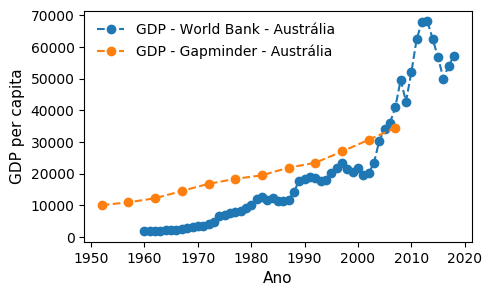

In [10]:
plt.style.use('default')

arqwb=wbaus
arqwbpais=wbaus.Australia
arqsc=scaus
arqscpais=scaus.Australia
pais='Austrália'

plt.figure(figsize=[5,3])
plt.plot(arqwb.ano[arqwbpais.notnull()],arqwbpais[arqwbpais.notnull()],'o--',label='GDP - World Bank - ' + pais)
plt.plot(arqsc.ano[arqscpais.notnull()],arqscpais[arqscpais.notnull()],'o--',label='GDP - Gapminder - ' + pais)

plt.xlabel('Ano',fontsize=11)
plt.ylabel('GDP per capita',fontsize=11)

plt.legend(loc='best', frameon=False)

In [11]:
# Abaixo vemos a diferença de estatísticas entre as duas bases, só até 2007.
abs((arqwbpais[arqwb.ano<=2007].describe()-arqscpais[arqsc.ano<=2007].describe()))

count       36.000000
mean      6763.913402
std       2019.515714
min       8231.809930
25%      10118.571400
50%       7334.040029
75%       4679.292616
max       6524.687055
Name: Australia, dtype: float64

In [12]:
# Diferença percentual entre as médias:
abs((arqwbpais[arqwb.ano<=2007].mean()-arqscpais[arqsc.ano<=2007].mean())/arqscpais[arqsc.ano<=2007].mean())

0.33852411238991825

### Brasil

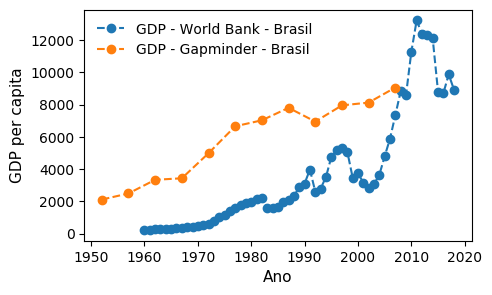

In [13]:
arqwb=wbbras
arqwbpais=wbbras.Brazil
arqsc=scbras
arqscpais=scbras.Brazil
pais='Brasil'

plt.figure(figsize=[5,3])
plt.plot(arqwb.ano[arqwbpais.notnull()],arqwbpais[arqwbpais.notnull()],'o--',label='GDP - World Bank - ' + pais)
plt.plot(arqsc.ano[arqscpais.notnull()],arqscpais[arqscpais.notnull()],'o--',label='GDP - Gapminder - ' + pais)

plt.xlabel('Ano',fontsize=11)
plt.ylabel('GDP per capita',fontsize=11)

plt.legend(loc='best', frameon=False)

In [14]:
# Abaixo vemos a diferença em estatísticas entre as duas bases, só até 2007:
abs(arqwbpais[arqwb.ano<=2007].describe()-arqscpais[arqsc.ano<=2007].describe())

count      36.000000
mean     3567.858456
std       669.831643
min      1903.903587
25%      2840.696535
50%      4860.817068
75%      4607.624849
max      1717.770031
Name: Brazil, dtype: float64

In [15]:
# Diferença percentual entre as médias:
abs((arqwbpais[arqwb.ano<=2007].mean()-arqscpais[arqsc.ano<=2007].mean())/arqscpais[arqsc.ano<=2007].mean())

0.6120543227650596

### Canada

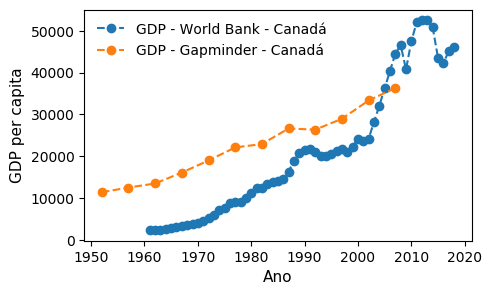

In [16]:
arqwb=wbcan
arqwbpais=wbcan.Canada
arqsc=sccan
arqscpais=sccan.Canada
pais='Canadá'

plt.figure(figsize=[5,3])
plt.plot(arqwb.ano[arqwbpais.notnull()],arqwbpais[arqwbpais.notnull()],'o--',label='GDP - World Bank - ' + pais)
plt.plot(arqsc.ano[arqscpais.notnull()],arqscpais[arqscpais.notnull()],'o--',label='GDP - Gapminder - ' + pais)

plt.xlabel('Ano',fontsize=11)
plt.ylabel('GDP per capita',fontsize=11)

plt.legend(loc='best', frameon=False)

In [17]:
# Abaixo vemos a diferença em estatísticas entre as duas bases, só até 2007.
abs((arqwbpais[arqwb.ano<=2007].describe()-arqscpais[arqsc.ano<=2007].describe()))

count      35.000000
mean     7315.589081
std      2343.226443
min      9092.737847
25%      9958.937992
50%      8616.920524
75%      5870.762999
max      8223.806026
Name: Canada, dtype: float64

In [18]:
# Diferença percentual entre as médias:
abs((arqwbpais[arqwb.ano<=2007].mean()-arqscpais[arqsc.ano<=2007].mean())/arqscpais[arqsc.ano<=2007].mean())

0.3264321933016795

O que percebemos é que os valores do Gapminder são bem mais altos que do World Bank (se aproximam por volta de 2007), e que enquanto o World Bank tem dados até 2019, o Gapminder só tem até 2007, além disso o gapminder tem muitos meses faltando.

Pra entender eu fui buscar a descrição em cada base do dia de hoje (13/12).

Gapminder: o site hoje tem dados até 2017, os dados estão em dólares, e o critério utilizado é inflação ajustada (não diz mas imagino que para hoje), e cotação do dólar de 2010. Um ponto importante é que esse critério da cotação do dólar é de hoje, então muito provavelmente a cotação utilizada na base da lição é de vários anos antes de 2007 também. Então se a defasagem for também de cerca de 10 anos, nós comparamos acima bases com cerca de 20 anos de diferença de cotação, além disso a inflação ajustada deve ter sido relativa a época de geração da base logo está bem defasada também. Assim faz todo sentido os resultados serem tão diferentes. <br>
https://www.gapminder.org/data/

World Bank: o site hoje tem dados até 2019, os dados estão em dólares, o site não fala nada da inflação então não sei qual o tratamento, porém usa a cotação do dólar do ano em questão. Busquei informações nos metadados da tabela, mas não consegui outras informações. <br>
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=BR&view=chart

Assim, eu farei um teste, vou gerar a base do Gapminder de hoje e fazer o mesmo gráfico só para o Brasil para ver como fica.

In [19]:
# Lendo o arquivo do software-carpentry pras americas, e colocando num formato amigável.
gaphj=pd.read_csv('gdp_hoje.csv',delimiter=',',comment='#',index_col='country')
gaphj.columns = gaphj.columns.astype(int)
gaphj=gaphj.T.filter(['Brazil'])
gaphj=gaphj.reset_index()
gaphj=gaphj.rename(columns={'index':'ano'})

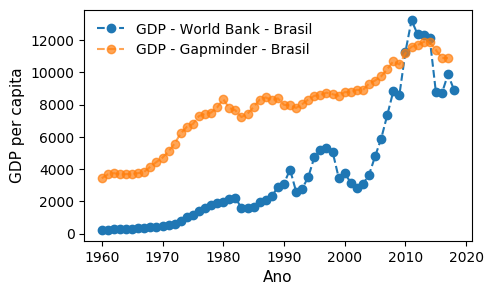

In [20]:
arqwb=wbbras
arqwbpais=wbbras.Brazil
arqsc=gaphj
arqscpais=gaphj.Brazil
pais='Brasil'

plt.figure(figsize=[5,3])
plt.plot(arqwb.ano[arqwbpais.notnull()],arqwbpais[arqwbpais.notnull()],'o--',label='GDP - World Bank - ' + pais)
plt.plot(arqsc.ano[arqscpais.notnull()],arqscpais[arqscpais.notnull()],'o--',label='GDP - Gapminder - ' + pais,alpha=0.7)

plt.xlabel('Ano',fontsize=11)
plt.ylabel('GDP per capita',fontsize=11)

plt.legend(loc='best', frameon=False)

In [21]:
# Abaixo vemos a diferença em estatísticas entre as duas bases, só até 2017.
abs((arqwbpais[arqwb.ano<=2017].describe()-arqscpais[arqsc.ano<=2017].describe()))

count       0.000000
mean     4109.110998
std      1214.275141
min      3224.959232
25%      5623.463578
50%      5706.351640
75%      3904.526562
max      1345.615526
Name: Brazil, dtype: float64

In [22]:
# Diferença percentual entre as médias, só até 2017.
abs((arqwbpais[arqwb.ano<=2017].mean()-arqscpais[arqsc.ano<=2017].mean())/arqscpais[arqsc.ano<=2017].mean())

0.5260765024317243

Como vemos, os gráficos continuam bem diferentes. Vemos que a diferença entre médias é maior nesta nova comparação, mas em contra-partida, a variação proporcional entre elas é menor. Não temos muita informação a respeito da correção da inflação nas duas bases de hoje, então é difícil quantificar esse efeito. Porém, sabemos que uma base considera a cotação de 2010 e outra a do ano em questão. Isso parece justificar pelo menos boa parte da defasagem, vemos que os gráficos se aproximam a medida que se chega a 2010, sendo que no ano de 2010 os pontos de dados quase se sobrepõem, o que faz todo sentido já que nesse ano as bases usam aproximadamente a mesma cotação.

### 4) Avalie também a Electric power consumption (kWh per capita) para os mesmos 3 países e faça uma análise superficial dos resultados: mais alto, mais baixo, crescimento de consumo...


In [23]:
# Lendo o arquivo
kwh=pd.read_csv('kwh.csv',delimiter=',',comment='#',index_col='Country Name')
kwh=kwh.drop(['Country Code','Indicator Name','Indicator Code','Unnamed: 64'],axis=1)
kwh.columns = kwh.columns.astype(int)
kwh=kwh.T
kwh=kwh.reset_index()
kwh=kwh.rename(columns={'index':'ano'})

# Separando cada  país
bra=kwh.filter(['ano','Brazil'])
bra=bra[bra.Brazil.notnull()]
bra=bra.reset_index()

can=kwh.filter(['ano','Canada'])
can=can[can.Canada.notnull()]
can=can.reset_index()

aus=kwh.filter(['ano','Australia'])
aus=aus[aus.Australia.notnull()]
aus=aus.reset_index()

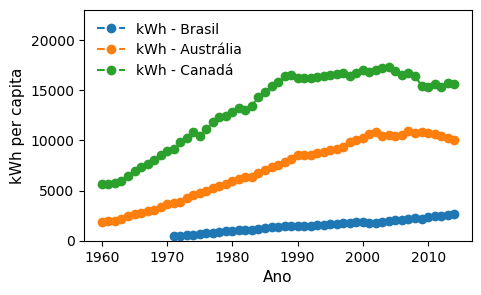

In [24]:
# Vou fazer um plot dos três países

plt.figure(figsize=[5,3])
plt.plot(bra.ano,bra.Brazil,'o--',label='kWh - Brasil')
plt.plot(aus.ano,aus.Australia,'o--',label='kWh - Austrália')
plt.plot(can.ano,can.Canada,'o--',label='kWh - Canadá')

plt.xlabel('Ano',fontsize=11)
plt.ylabel('kWh per capita',fontsize=11)

plt.ylim(0,23000)

plt.legend(loc='best', frameon=False)

Vemos no gráfico acima, que o kWh per capita sempre foi maior do Canadá, depois Austrália e por último Brasil. Vemos também uma tendência predominantemente crescente e que cai um pouco para Austrália e Canadá na última década. Agora vou ver as estatísticas de cada país. Verei as estatísticas gerais, o ano de consumo máximo, mínimo e os anos de maior variação positiva e negativa.

### Australia

In [25]:
ano=aus.ano
dados=aus.Australia
pais='Austrália'

# Estatísticas gerais:
dados.describe()

count       55.000000
mean      7073.623497
std       3051.760583
min       1825.625650
25%       4404.612983
50%       7525.685721
75%      10132.655580
max      10972.891740
Name: Australia, dtype: float64

In [26]:
# Ano de consumo mínimo e máximo:

i, = np.where(dados==dados.min())
print('O consumo mínimo da',pais,'foi no ano', ano[i].item())

i, = np.where(dados==dados.max())
print('O consumo máximo da',pais,'foi no ano', ano[i].item())

O consumo mínimo da Austrália foi no ano 1960
O consumo máximo da Austrália foi no ano 2007


In [27]:
# Variações máximas e  mínimas
i, = np.where(np.diff(dados)==np.diff(dados).min())
print('A variação mínima do consumo da',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

i, = np.where(np.diff(dados)==np.diff(dados).max())
print('A variação máxima do consumo da',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

A variação mínima do consumo da Austrália foi do ano 2002 para 2003
A variação máxima do consumo da Austrália foi do ano 1997 para 1998


### Canada

In [28]:
ano=can.ano
dados=can.Canada
pais='Canadá'

# Estatísticas gerais:
dados.describe()

count       55.000000
mean     13266.022107
std       3825.751115
min       5605.111926
25%      10354.251742
50%      15336.624857
75%      16412.562546
max      17264.736744
Name: Canada, dtype: float64

In [29]:
# Ano de consumo mínimo e máximo:

i, = np.where(dados==dados.min())
print('O consumo mínimo do',pais,'foi no ano', ano[i].item())

i, = np.where(dados==dados.max())
print('O consumo máximo do',pais,'foi no ano', ano[i].item())

O consumo mínimo do Canadá foi no ano 1961
O consumo máximo do Canadá foi no ano 2004


In [30]:
# Variações máximas e  mínimas
i, = np.where(np.diff(dados)==np.diff(dados).min())
print('A variação mínima do consumo do',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

i, = np.where(np.diff(dados)==np.diff(dados).max())
print('A variação máxima do consumo do',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

A variação mínima do consumo do Canadá foi do ano 2008 para 2009
A variação máxima do consumo do Canadá foi do ano 1983 para 1984


### Brasil

In [31]:
ano=bra.ano
dados=bra.Brazil
pais='Brasil'

# Estatísticas gerais:
dados.describe()

count      44.000000
mean     1525.282243
std       598.079340
min       459.885691
25%      1047.350083
50%      1515.827106
75%      1912.054693
max      2619.960616
Name: Brazil, dtype: float64

In [32]:
# Ano de consumo mínimo e máximo:

i, = np.where(dados==dados.min())
print('O consumo mínimo do',pais,'foi no ano', ano[i].item())

i, = np.where(dados==dados.max())
print('O consumo máximo do',pais,'foi no ano', ano[i].item())

O consumo mínimo do Brasil foi no ano 1971
O consumo máximo do Brasil foi no ano 2014


In [33]:
# Variações máximas e  mínimas
i, = np.where(np.diff(dados)==np.diff(dados).min())
print('A variação mínima do consumo do',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

i, = np.where(np.diff(dados)==np.diff(dados).max())
print('A variação máxima do consumo do',pais,'foi do ano', ano[i].item(),'para',ano[i+1].item())

A variação mínima do consumo do Brasil foi do ano 2000 para 2001
A variação máxima do consumo do Brasil foi do ano 2009 para 2010
